In [2]:
import pymysql.cursors
import pandas as pd

conn = pymysql.connect(host='172.20.95.116', user='emily0', password='1234',
                       db='leisure', charset='utf8')

curs = conn.cursor()

In [ ]:
cur = conn.cursor(pymysql.cursors.DictCursor)
query = """
select ts.year, ts.전국 as 티켓판매수, u.전국 as 실업률
from tickets_sold as ts
	inner join unemployment_data as u on ts.year = u.year;
"""
cur.execute(query)
rows = cur.fetchall() 
result_df = pd.DataFrame(rows) 
print(result_df)
cur.close()
conn.close()

   year       티켓판매수  실업률
0  2015   2,367,598  3.6
1  2016   2,925,113  3.7
2  2017   4,488,769  3.7
3  2018   3,976,709  3.8
4  2019  11,391,143  3.8
5  2020   4,900,588  4.0
6  2021   8,082,994  3.7
7  2022  18,220,363  2.9
8  2023  20,842,801  2.7
9  2024  22,366,833  2.8


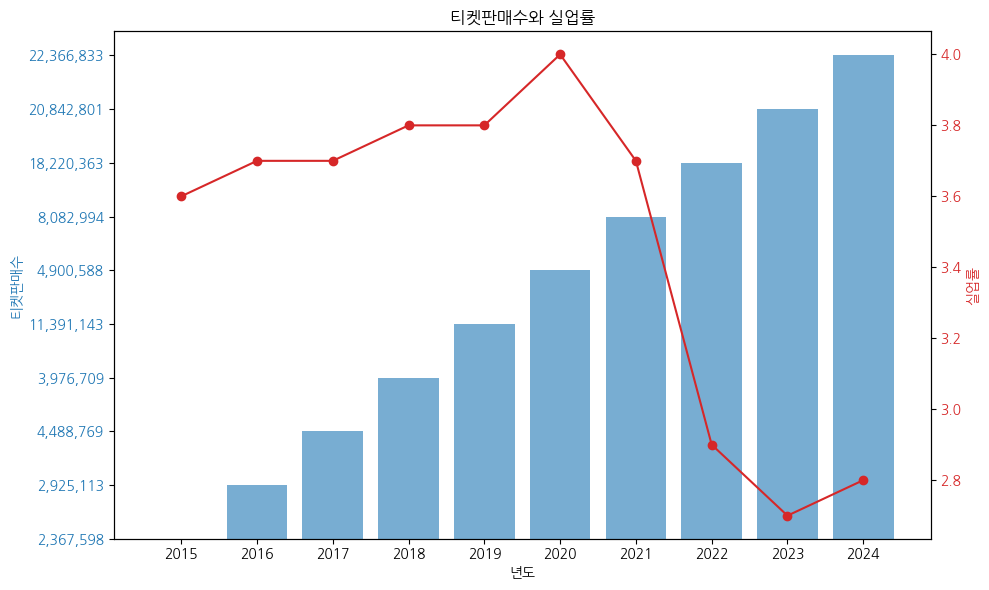

In [ ]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

fig, ax1 = plt.subplots(figsize=(10, 6))

# 티켓판매수 시각화 (왼쪽 y축)
ax1.set_xlabel('년도')
ax1.set_ylabel('티켓판매수', color='tab:blue')
ax1.bar(result_df['year'], result_df['티켓판매수'], color='tab:blue', alpha=0.6, label='티켓판매수')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# 실업률 시각화 (오른쪽 y축)
ax2 = ax1.twinx() 
ax2.set_ylabel('실업률', color='tab:red')
ax2.plot(result_df['year'], result_df['실업률'], color='tab:red', marker='o', label='실업률')
ax2.tick_params(axis='y', labelcolor='tab:red')

# x축 레이블 회전
ax1.set_xticks(result_df['year'])
ax1.set_xticklabels(result_df['year'])

# 제목 설정
plt.title('티켓판매수와 실업률')
fig.tight_layout() 
plt.show()


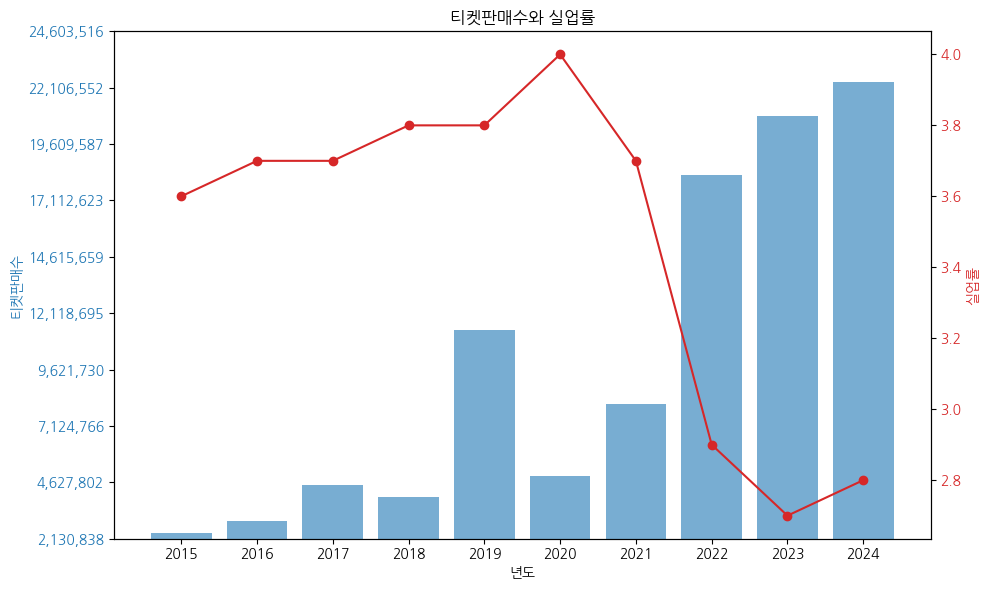

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib

fig, ax1 = plt.subplots(figsize=(10, 6)) 

# 데이터 변환: 쉼표(,) 제거 후 숫자로 변환 (오류 방지)
result_df['티켓판매수'] = result_df['티켓판매수'].astype(str).str.replace(',', '').astype(float)

# 티켓판매액 시각화 (왼쪽 y축)
ax1.set_xlabel('년도')
ax1.set_ylabel('티켓판매수', color='tab:blue')
ax1.bar(result_df['year'], result_df['티켓판매수'], color='tab:blue', alpha=0.6, label='티켓판매수')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# y축 범위 및 정렬된 눈금 설정
y_min = min(result_df['티켓판매수']) * 0.9  
y_max = max(result_df['티켓판매수']) * 1.1  
ax1.set_ylim(2367598, 22366833)  
ax1.set_yticks(np.linspace(y_min, y_max,num=10))  

# y축 숫자를 보기 쉽게 포맷 (예: 1,000 단위 쉼표 추가)
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x):,}"))

# 고용률 시각화 (오른쪽 y축)
ax2 = ax1.twinx()  
ax2.set_ylabel('실업률', color='tab:red')
ax2.plot(result_df['year'], result_df['실업률'], color='tab:red', marker='o', label='실업률')
ax2.tick_params(axis='y', labelcolor='tab:red')

# x축 레이블 설정
ax1.set_xticks(result_df['year'])
ax1.set_xticklabels(result_df['year'])

# 제목 설정
plt.title('티켓판매수와 실업률')
fig.tight_layout() 
plt.show()